# Load historical data

The data is stored in a parquet file, which we assume has been extracted (see README.md in the directory!).

In [46]:
import pandas as pd

In [67]:
DF = pd.read_parquet("CoinGecko_2013-04-28_2021-03-28.parquet")

In [68]:
DF.head()

01coin                   0-5x-long-algorand-token              \
           Market Cap Volume Open Close               Market Cap Volume Open   
Date                                                                           
2013-04-28        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-04-29        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-04-30        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-05-01        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-05-02        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   

                 0-5x-long-altcoin-index-token         ...  zyx        \
           Close                    Market Cap Volume  ... Open Close   
Date                                                   ...              
2013-04-28   NaN                           NaN    NaN  ...  NaN   NaN   
2013-04-29   NaN                           NaN    NaN  ...  NaN   NaN   
2013-04-30   NaN                           NaN    NaN  ...  NaN   NaN   
2013-05-01   NaN                           NaN    NaN  ...  NaN   NaN   
2013-05-02   NaN                           NaN    NaN  ...  NaN   NaN   

           zzz-finance                   zzz-finance-v2                    
            Market Cap Volume Open Close     Market Cap Volume Open Close  
Date                                                                       
2013-04-28         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-04-29         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-04-30         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-05-01         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-05-02         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  

[5 rows x 26192 columns]

In [69]:
from pycoingecko import CoinGeckoAPI
gecko = CoinGeckoAPI()

In [70]:
coins_list = pd.DataFrame(gecko.get_coins_list())

In [72]:
if all(pd.MultiIndex.from_product([coins_list['id'], ["Market Cap", "Volume", "Open", "Close"]]) == DF.columns):
    print ("Columns match!")

ValueError: Lengths must match to compare

In [74]:
set_diff = set(coins_list['id']) - set(DF.columns.levels[0].to_list())

if len(set_diff) == 0:
    print ("Columns match again!")
else:
    print(set_diff)

{'meliora', 'arc-block-protocol', 'evny-token', 'bamboo-token-2', 'sishi-finance', 'linkpool', 'nyan-cat', 'cheesecakeswap', 'ziot', 'whitex', 'moviecash'}


# Plots

Random plots just to see if everything's working.

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


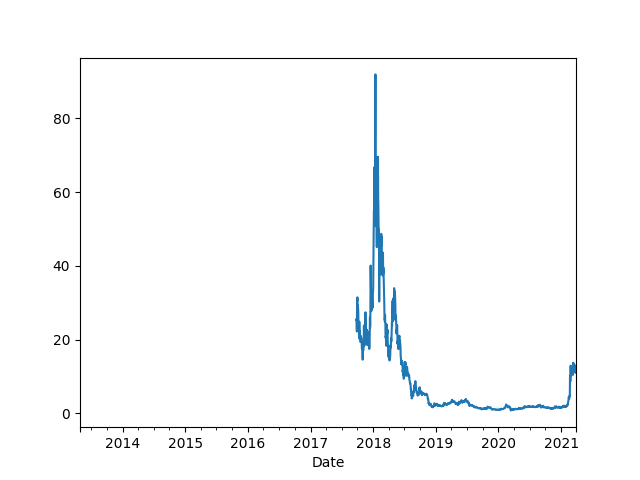

In [77]:
fig = plt.figure(); DF['gas']['Close'].plot(figure=fig);

<IPython.core.display.Javascript object>


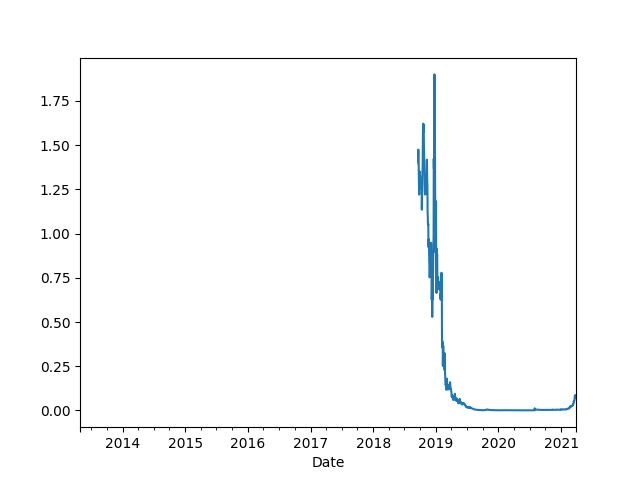

<AxesSubplot:xlabel='Date'>

In [76]:
fig = plt.figure(); DF['spendcoin']['Close'].plot(figure=fig);

<IPython.core.display.Javascript object>


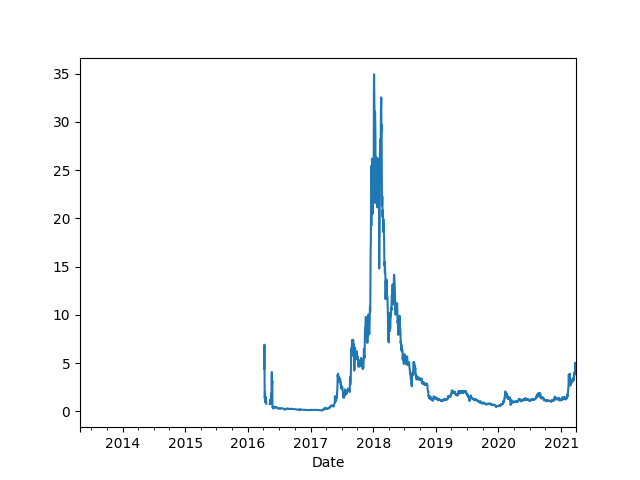

In [78]:
fig = plt.figure(); DF['lisk']['Close'].plot(figure=fig);

<IPython.core.display.Javascript object>


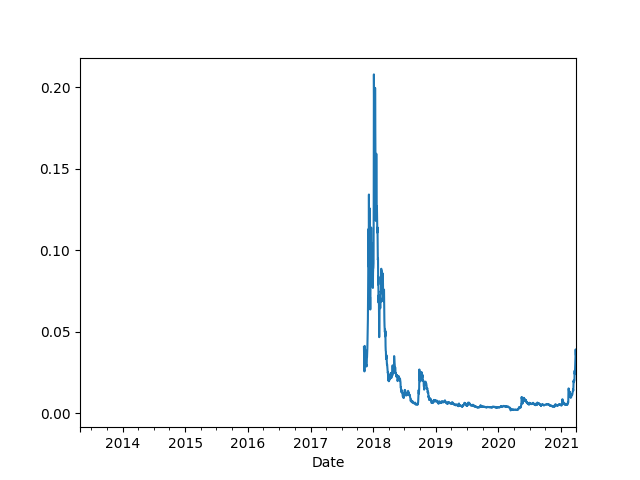

In [79]:
fig = plt.figure(); df['electroneum']['Close'].plot(figure=fig);

# Moonshots plotting

In [65]:
moonshots = ['spnd', 'qtum', 'iost', 'dent', 'ont', 'icx', 'zec', 'lsk', 'etn', 'btg', 'waxp', 'kcs', 'ardr', 'agi', 'ark', 'steem', 'qkc', 'alice', 'kmd', 'med', 'bitshares', 'fun', 'wan', 'pivx', 'rdd', 'powr', 'btm', 'gas', 'elf', 'strax', 'monacoin', 'lbc', 'nrg', 'loom', 'refereum', 'blz', 'cbat', 'adx', 'ela', 'solve', 'req']

In [57]:
coins_list.loc[coins_list['symbol'] == 'rfr']

,id,symbol,name
4737,refereum,rfr,Refereum
4744,refract,rfr,Refract


In [80]:
for coin in moonshots:
    r = coins_list.loc[(coins_list['id'] == coin) | (coins_list['symbol'] == coin)]
    if len(r) == 1:
        continue
        # print ("{}: {}, {}".format(r['id'].iloc[0], r['name'].iloc[0], r['symbol'].iloc[0]))
    elif len(r) > 1:
        print ("{} is not unique!".format(coin))
    else:
        print ("{} not found!".format(coin))

In [81]:
df_bitcoin = DF['bitcoin']

In [117]:
index = pd.date_range(start='20130501', end='20210329', freq='MS', closed='left')
df_bitcoin.loc[index]

,Market Cap,Volume,Open,Close
2013-05-01,1.298952e+09,0.000000e+00,117.000000,103.430000
2013-06-01,1.449500e+09,0.000000e+00,129.090000,121.300000
2013-07-01,1.107085e+09,0.000000e+00,97.504000,89.489000
2013-08-01,1.220482e+09,0.000000e+00,106.230000,101.610000
2013-09-01,1.607960e+09,0.000000e+00,138.170000,137.170000
...,...,...,...,...
2020-11-01,2.553293e+11,2.269120e+10,13778.637638,13720.361465
2020-12-01,3.639277e+11,3.616083e+10,19609.521440,18857.417371
2021-01-01,5.394380e+11,4.350352e+10,29022.418395,29352.126792
2021-02-01,6.150138e+11,4.248865e+10,33064.786767,33405.990357


In [132]:
df_bitcoin_monthly = df_bitcoin.loc['2013-05-01':].resample('MS').apply({'Open':'first', 'Close':'last', 'Volume':'sum', 'Market Cap':'last'})

In [134]:
df_bitcoin_monthly['Change'] = (df_bitcoin_monthly['Close'] - df_bitcoin_monthly['Open'])/df_bitcoin_monthly['Open']

In [152]:
df_bitcoin_monthly['Change'].groupby(df_bitcoin_monthly.index.year).apply(lambda x: pd.Series(x.values, index=x.index.month)).unstack()

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,0.103333,-0.244682,0.089494,0.300668,-0.040675,0.548548,4.034542,-0.257067
2014,0.084378,-0.327211,-0.145317,-0.049351,0.406667,0.005894,-0.077755,-0.198775,-0.199498,-0.149434,0.171348,-0.172593
2015,-0.279378,0.138940,-0.042420,-0.056874,-0.040485,0.153091,0.090078,-0.190730,0.046542,0.367052,0.118318,0.195287
2016,-0.145907,0.162597,-0.033885,0.085993,0.191289,0.256955,-0.106186,-0.056388,0.074301,0.187514,0.032707,0.325335
2017,-0.011500,0.244183,-0.115867,0.297803,0.729593,0.001553,0.122117,0.776338,-0.106024,0.544489,0.637538,0.281735
2018,-0.282335,0.022954,-0.325843,0.318685,-0.188953,-0.146601,0.215464,-0.091832,-0.057145,-0.039136,-0.370211,-0.079098
2019,-0.070572,0.111792,0.075457,0.289820,0.620246,0.269653,-0.075780,-0.045285,-0.139061,0.106457,-0.174329,-0.047806
2020,0.293657,-0.081120,-0.249186,0.340864,0.099450,-0.033510,0.237803,0.030619,-0.077229,0.279249,0.423183,0.480017
2021,0.139284,0.360062,0.241544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
